In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd

# 加载 dataset_stats.csv
stats_df = pd.read_csv('dataset_stats.csv')

# 显示前5行
print("dataset_stats.csv 的前5行:")
print(stats_df.head())

# 显示基本信息，包括列名、非空值数量和数据类型
print("\ndataset_stats.csv 的信息:")
print(stats_df.info())

dataset_stats.csv 的前5行:
               class  image_count  avg_width  avg_height  min_width  \
0  adidas_forum_high          150        143         124         78   
1  adidas_ultraboost          150        142         128         93   
2    new_balance_550          150        134         129         79   
3    new_balance_574          150        131         133         78   
4  converse_one_star          150        138         130         82   

   min_height  max_width  max_height formats  corrupt_files  
0          81        162         140    jpeg              0  
1          49        162         140    jpeg              0  
2          40        162         140    jpeg              0  
3          68        162         140    jpeg              0  
4          67        162         140    jpeg              0  

dataset_stats.csv 的信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  --

In [10]:
import os
import pandas as pd

# Define the base directory where sneaker images are located
# Based on the example path: /kaggle/input/sneakers-classification/sneakers-dataset/sneakers-dataset/new_balance_992/0106.jpg
BASE_IMG_DIR = 'datasource'

# Create empty lists to store image paths and their corresponding labels
image_paths = []
labels = []

# Iterate through each class folder to collect image paths
# The 'class' names in dataset_stats.csv should match the folder names
for class_name in stats_df['class']:
    class_dir = os.path.join(BASE_IMG_DIR, class_name)
    if os.path.exists(class_dir): # Check if the directory exists
        for img_name in os.listdir(class_dir):
            if img_name.endswith(('.jpg', '.jpeg', '.png', '.gif')): # Filter for common image formats
                image_paths.append(os.path.join(class_dir, img_name))
                labels.append(class_name)
    else:
        print(f"Warning: Directory for class '{class_name}' not found at {class_dir}")

# Create a DataFrame from the collected data
image_df = pd.DataFrame({
    'image_path': image_paths,
    'class': labels
})

# Display the first few rows of the new DataFrame
print("\nimage path DataFrame first 5 lines:")
print(image_df.head())

# Display the total number of images found
print(f"\n Total picture: {len(image_df)}")

# Check for any discrepancies in class counts
print("\n每个类别的图片数量 (应与 dataset_stats.csv 中的 image_count 匹配):")
print(image_df['class'].value_counts().sort_index())


image path DataFrame first 5 lines:
                              image_path              class
0  datasource\adidas_forum_high\0001.jpg  adidas_forum_high
1  datasource\adidas_forum_high\0002.jpg  adidas_forum_high
2  datasource\adidas_forum_high\0003.jpg  adidas_forum_high
3  datasource\adidas_forum_high\0004.jpg  adidas_forum_high
4  datasource\adidas_forum_high\0005.jpg  adidas_forum_high

 Total picture: 5856

每个类别的图片数量 (应与 dataset_stats.csv 中的 image_count 匹配):
class
adidas_forum_high                      150
adidas_forum_low                        92
adidas_gazelle                         149
adidas_nmd_r1                           95
adidas_samba                            74
adidas_stan_smith                      147
adidas_superstar                        93
adidas_ultraboost                      150
asics_gel-lyte_iii                      91
converse_chuck_70_high                  75
converse_chuck_70_low                  148
converse_chuck_taylor_all-star_high     78
conver

In [11]:
print(image_df.shape)
print(image_df.head())

(5856, 2)
                              image_path              class
0  datasource\adidas_forum_high\0001.jpg  adidas_forum_high
1  datasource\adidas_forum_high\0002.jpg  adidas_forum_high
2  datasource\adidas_forum_high\0003.jpg  adidas_forum_high
3  datasource\adidas_forum_high\0004.jpg  adidas_forum_high
4  datasource\adidas_forum_high\0005.jpg  adidas_forum_high



Comparing image counts from collected data vs. dataset_stats.csv:
                                     Collected_Count  Stats_CSV_Count  Match
class                                                                       
adidas_forum_high                                150              150   True
adidas_forum_low                                  92               92   True
adidas_gazelle                                   149              149   True
adidas_nmd_r1                                     95               95   True
adidas_samba                                      74               74   True
adidas_stan_smith                                147              147   True
adidas_superstar                                  93               93   True
adidas_ultraboost                                150              150   True
asics_gel-lyte_iii                                91               91   True
converse_chuck_70_high                            75               75   True
converse_

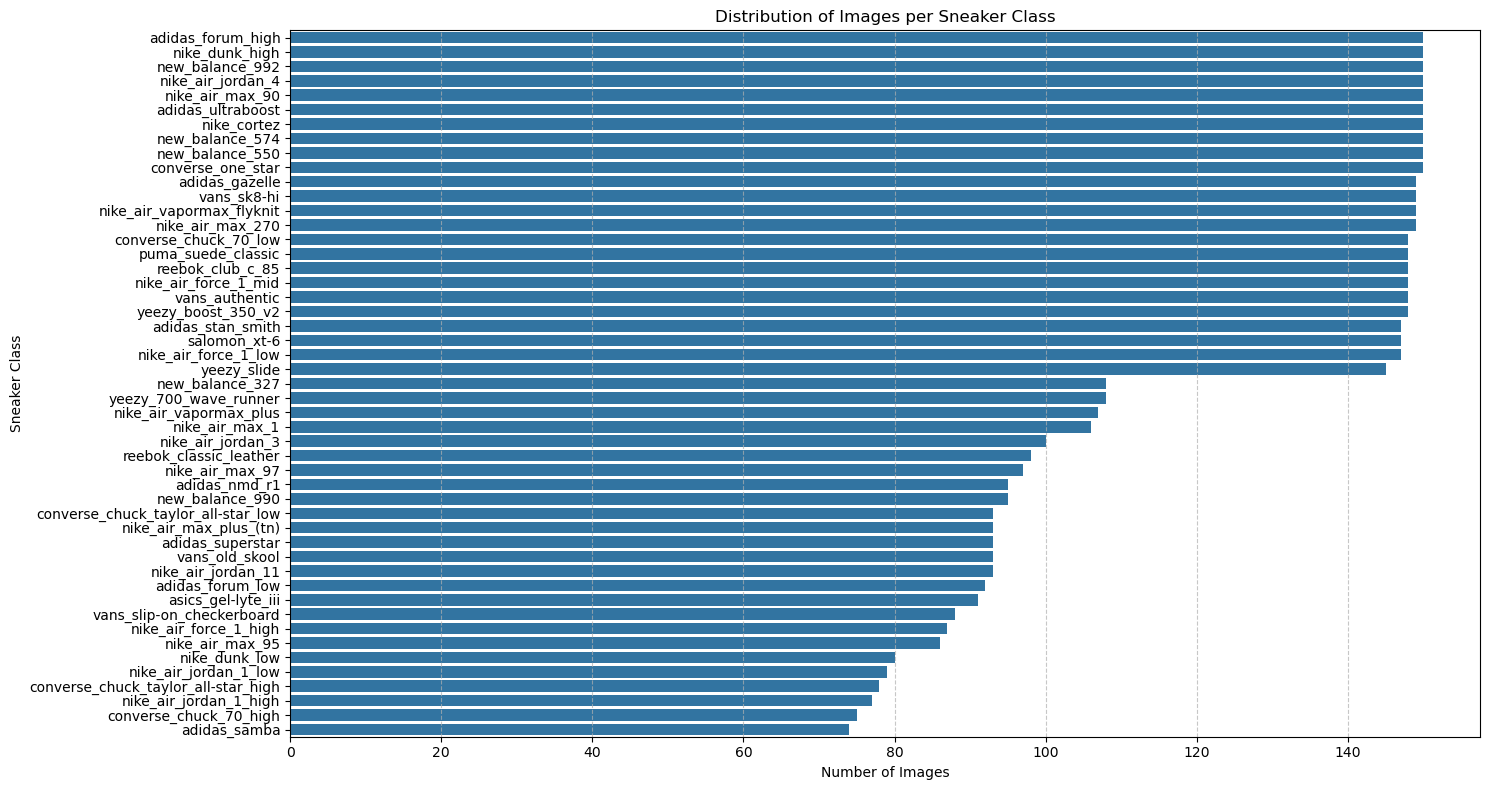


Class Name to Encoded Label Mapping:
adidas_forum_high: 0
adidas_forum_low: 1
adidas_gazelle: 2
adidas_nmd_r1: 3
adidas_samba: 4
adidas_stan_smith: 5
adidas_superstar: 6
adidas_ultraboost: 7
asics_gel-lyte_iii: 8
converse_chuck_70_high: 9
converse_chuck_70_low: 10
converse_chuck_taylor_all-star_high: 11
converse_chuck_taylor_all-star_low: 12
converse_one_star: 13
new_balance_327: 14
new_balance_550: 15
new_balance_574: 16
new_balance_990: 17
new_balance_992: 18
nike_air_force_1_high: 19
nike_air_force_1_low: 20
nike_air_force_1_mid: 21
nike_air_jordan_11: 22
nike_air_jordan_1_high: 23
nike_air_jordan_1_low: 24
nike_air_jordan_3: 25
nike_air_jordan_4: 26
nike_air_max_1: 27
nike_air_max_270: 28
nike_air_max_90: 29
nike_air_max_95: 30
nike_air_max_97: 31
nike_air_max_plus_(tn): 32
nike_air_vapormax_flyknit: 33
nike_air_vapormax_plus: 34
nike_cortez: 35
nike_dunk_high: 36
nike_dunk_low: 37
puma_suede_classic: 38
reebok_classic_leather: 39
reebok_club_c_85: 40
salomon_xt-6: 41
vans_authent

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os # Already imported, but good practice to keep it if needed

# --- Data Exploration and Verification ---

# Load dataset_stats.csv again (if not already loaded in current session)
# stats_df = pd.read_csv('/kaggle/input/sneakers-classification/dataset_stats.csv')

# Compare the image counts from our collected DataFrame with dataset_stats.csv
print("\nComparing image counts from collected data vs. dataset_stats.csv:")
# Create a series from value_counts for easy comparison
collected_counts = image_df['class'].value_counts().sort_index()
# Create a series from dataset_stats.csv for relevant classes only
stats_counts = stats_df[stats_df['class'].isin(collected_counts.index)].set_index('class')['image_count'].sort_index()

comparison_df = pd.DataFrame({
    'Collected_Count': collected_counts,
    'Stats_CSV_Count': stats_counts
})
comparison_df['Match'] = (comparison_df['Collected_Count'] == comparison_df['Stats_CSV_Count'])
print(comparison_df)

# Check for any discrepancies (where Match is False)
if not comparison_df['Match'].all():
    print("\nDiscrepancies found between collected image counts and dataset_stats.csv:")
    print(comparison_df[comparison_df['Match'] == False])
else:
    print("\nAll collected image counts match dataset_stats.csv (for existing directories).")

# Visualize class distribution
plt.figure(figsize=(15, 8))
sns.countplot(data=image_df, y='class', order=image_df['class'].value_counts().index)
plt.title('Distribution of Images per Sneaker Class')
plt.xlabel('Number of Images')
plt.ylabel('Sneaker Class')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Data Preprocessing: Label Encoding and Splitting ---

# Encode the 'class' labels into numerical format
label_encoder = LabelEncoder()
image_df['encoded_class'] = label_encoder.fit_transform(image_df['class'])

# Display the mapping of original class names to encoded numbers
print("\nClass Name to Encoded Label Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}: {i}")

# Split the data into training, validation, and test sets
# Stratify ensures that the proportion of classes is roughly the same in each split
# First, split into training + validation, and test
train_val_df, test_df = train_test_split(
    image_df,
    test_size=0.2, # 20% for testing
    random_state=42,
    stratify=image_df['encoded_class']
)

# Then, split training + validation into training and validation
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.25, # 25% of train_val_df (which is 20% of original total)
                    # so 0.25 * 0.8 = 0.2 of original data for validation
    random_state=42,
    stratify=train_val_df['encoded_class']
)

# Display the sizes of the created datasets
print(f"\nTotal images: {len(image_df)}")
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Verify class distribution in splits (optional, but good for sanity check)
# print("\nClass distribution in Training Set:")
# print(train_df['class'].value_counts(normalize=True).sort_index())
# print("\nClass distribution in Validation Set:")
# print(val_df['class'].value_counts(normalize=True).sort_index())
# print("\nClass distribution in Test Set:")
# print(test_df['class'].value_counts(normalize=True).sort_index())

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image # For opening and processing images

# --- Image Preprocessing: Define Transforms ---

# Define transformations for the training set
# These include data augmentation to improve model robustness and prevent overfitting
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # Resize all images to a fixed size (e.g., 224x224 for many pre-trained models)
    transforms.RandomHorizontalFlip(), # Data augmentation: randomly flip images horizontally
    transforms.RandomRotation(10), # Data augmentation: randomly rotate images by a small degree
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Data augmentation: randomly change brightness, contrast, saturation, hue
    transforms.ToTensor(), # Convert PIL Image or NumPy array to PyTorch Tensor
    # Normalize pixel values to ImageNet means and standard deviations
    # This is crucial when using pre-trained models (e.g., from torchvision.models)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define transformations for the validation and test sets
# No data augmentation is applied to these sets, only resizing and normalization
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # Resize images to a fixed size
    transforms.ToTensor(), # Convert to PyTorch Tensor
    # Normalize pixel values
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Custom Dataset Class for PyTorch ---

class SneakerDataset(Dataset):
    """
    A custom Dataset class for loading sneaker images and their labels.
    """
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing 'image_path' and 'encoded_class' columns.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        """
        Returns the total number of items in the dataset.
        """
        return len(self.dataframe)

    def __getitem__(self, idx):
        """
        Retrieves an item (image and its label) at the given index.
        """
        img_path = self.dataframe.iloc[idx]['image_path']
        label = self.dataframe.iloc[idx]['encoded_class']

        # Open the image using PIL and convert to RGB (important for consistency)
        image = Image.open(img_path).convert('RGB')

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

# --- Create Dataset Instances and DataLoaders ---

# Create instances of the custom dataset for training, validation, and testing
train_dataset = SneakerDataset(train_df, transform=train_transforms)
val_dataset = SneakerDataset(val_df, transform=val_test_transforms)
test_dataset = SneakerDataset(test_df, transform=val_test_transforms)

# Define batch size for DataLoaders
BATCH_SIZE = 32 # You can adjust this value based on your GPU memory

# Create DataLoaders to efficiently load batches of data
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Display some information about the DataLoaders
print(f"\nNumber of batches in training loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

# Example of how to get a batch of data (optional for verification)
# for images, labels in train_loader:
#     print(f"Shape of image batch: {images.shape}") # Should be [BATCH_SIZE, 3, 224, 224]
#     print(f"Shape of label batch: {labels.shape}") # Should be [BATCH_SIZE]
#     break # Get only one batch for demonstration


Number of batches in training loader: 110
Number of batches in validation loader: 37
Number of batches in test loader: 37


In [14]:
print("Files found in /kaggle/input/ directory after adding new dataset:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files found in /kaggle/input/ directory after adding new dataset:


In [15]:
import torch
import torchvision.models
import numpy as np
from tqdm import tqdm # For progress bar

# Define the local path to your manually uploaded ResNet18 weights
# This path was confirmed from your previous os.walk output.
LOCAL_RESNET18_WEIGHTS_PATH = '/kaggle/input/pytorch-resnet18-model/resnet18-f37072fd.pth' 

# --- Feature Extraction using a Pre-trained CNN ---

# 1. Load a pre-trained CNN model
# Create the ResNet18 model architecture without pre-trained weights initially
model = torchvision.models.resnet18(weights=None) # Set weights to None to prevent automatic download

# Load the state_dict from your local file
try:
    model.load_state_dict(torch.load(LOCAL_RESNET18_WEIGHTS_PATH))
    print(f"Successfully loaded ResNet18 weights from {LOCAL_RESNET18_WEIGHTS_PATH}")
except Exception as e:
    print(f"Error loading local weights: {e}")
    print("Please ensure the LOCAL_RESNET18_WEIGHTS_PATH is correct and the file exists.")
    # If weights cannot be loaded, the program will raise an error and stop.
    raise

# 2. Modify the model structure for feature extraction
# Remove the final classification layer (fc layer for ResNet)
# The output of the layer just before 'fc' will be our features
feature_extractor = nn.Sequential(*list(model.children())[:-1])

# 3. Set the model to evaluation mode
# This disables dropout, batch normalization updates, etc., which are only for training.
feature_extractor.eval()

# Move the feature extractor to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = feature_extractor.to(device)
print(f"Using device: {device}")


def extract_features(data_loader, feature_extractor_model, name=""):
    """
    Extracts features and labels from a DataLoader using a given feature extractor model.
    """
    all_features = []
    all_labels = []

    # Disable gradient calculation for inference to save memory and speed up
    with torch.no_grad():
        for images, labels in tqdm(data_loader, desc=f"Extracting features for {name}"):
            images = images.to(device) # Move images to the device (GPU/CPU)
            features = feature_extractor_model(images)
            # Flatten the features from (batch_size, channels, 1, 1) to (batch_size, channels)
            features = features.squeeze().cpu().numpy()
            all_features.append(features)
            all_labels.append(labels.cpu().numpy())

    # Concatenate all features and labels
    all_features = np.concatenate(all_features, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    print(f"Finished extracting features for {name}. Shape: {all_features.shape}")
    return all_features, all_labels

# Extract features for training, validation, and test sets
train_features, train_labels = extract_features(train_loader, feature_extractor, "Training Set")
val_features, val_labels = extract_features(val_loader, feature_extractor, "Validation Set")
test_features, test_labels = extract_features(test_loader, feature_extractor, "Test Set")

# Now, these extracted features (train_features, val_features, test_features)
# and their corresponding labels (train_labels, val_labels, test_labels)
# are ready to be used as input for SVM, Random Forest, or XGBoost models.

print("\nFeature extraction complete!")
print("These features are ready for use with traditional ML models (SVM, RF, XGBoost).")

# Save the extracted features and labels to /kaggle/working/ directory
# This is crucial for creating an output dataset for team collaboration.
np.save('/kaggle/working/train_features.npy', train_features)
np.save('/kaggle/working/train_labels.npy', train_labels)
np.save('/kaggle/working/val_features.npy', val_features)
np.save('/kaggle/working/val_labels.npy', val_labels)
np.save('/kaggle/working/test_features.npy', test_features)
np.save('/kaggle/working/test_labels.npy', test_labels)
print("\nFeatures and labels saved to /kaggle/working/ directory.")

Error loading local weights: [Errno 2] No such file or directory: '/kaggle/input/pytorch-resnet18-model/resnet18-f37072fd.pth'
Please ensure the LOCAL_RESNET18_WEIGHTS_PATH is correct and the file exists.


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/pytorch-resnet18-model/resnet18-f37072fd.pth'